<a href="https://colab.research.google.com/github/jaisonjames0006/ML/blob/main/Twitter_Validation%20using%20NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
# read data frame
df=pd.read_csv('/content/twitter_validation.csv',header=None)

# specify the columns
df.columns=['Id','Location','Target','Text']

In [ ]:
# check the missing values
df.isna().sum()

Id          0
Location    0
Target      0
Text        0
dtype: int64

In [ ]:
# find the value count of the target
df['Target'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: Target, dtype: int64

In [ ]:
# find the unique elements in the target
df['Target'].unique()

array(['Irrelevant', 'Neutral', 'Negative', 'Positive'], dtype=object)

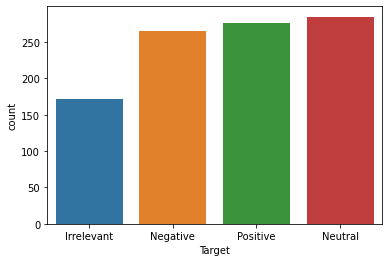

In [ ]:
# plot target count
import seaborn as sns
sns.countplot(x='Target',order=df['Target'].value_counts(ascending=True).index,data=df)

In [ ]:
# drop coulums Id and Location
df.drop(['Id','Location'],axis=1,inplace=True)

# drop rows where target==Irrelevant
df.drop(df.index[(df['Target']=='Irrelevant')],axis=0,inplace=True)

In [ ]:
df

,Target,Text
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...
5,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
993,Negative,Please explain how this is possible! How can t...
994,Positive,Good on Sony. As much as I want to see the new...
997,Positive,Today sucked so it’s time to drink wine n play...
998,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
# Reset the index
df.reset_index(drop=True,inplace=True)
df

,Target,Text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so it’s time to drink wine n play...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
# using map function change the target values
df['Target']=df['Target'].map({'Positive':1,'Negative':-1,'Neutral':0})
df

,Target,Text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so it’s time to drink wine n play...
826,1,Bought a fraction of Microsoft today. Small wins.


In [ ]:
tweets=df.Text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so it’s time to drink wine n play...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: Text, Length: 828, dtype: object

In [ ]:
# replace the special charcter to ' ' 
tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')
# '^' represents not and '+' represents all
tweets

<ipython-input-63-85a2a539e098>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')


0      BBC News Amazon boss Jeff Bezos rejects claims...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so it s time to drink wine n play...
826     Bought a fraction of Microsoft today Small wins 
827    Johnson Johnson to stop selling talc baby powd...
Name: Text, Length: 828, dtype: object

In [ ]:
# apply stemming and tokenize the tweets
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda x:[stemmer.stem(i.lower()) for i in tk.tokenize(x)]).apply(lambda x:' '.join(x))

In [ ]:
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi do i pay for word when it functi...
2      csgo matchmak is so full of closet hack it s a...
3      now the presid is slap american in the face th...
4      hi eahelp i ve had madelein mccann in my cella...
                             ...                        
823    pleas explain how this is possibl how can they...
824    good on soni as much as i want to see the new ...
825    today suck so it s time to drink wine n play b...
826       bought a fraction of microsoft today small win
827    johnson johnson to stop sell talc babi powder ...
Name: Text, Length: 828, dtype: object

In [ ]:
from nltk.stem.snowball import stopwords
import nltk
nltk.download('stopwords')
sw=stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# remove stopwords and join the tweets
tweets=tweets.apply(lambda x:[i for i in tk.tokenize(x) if i not in sw]).apply(lambda x:' '.join(x))

In [ ]:
# print the filtered tweet
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      hi eahelp madelein mccann cellar past 13 year ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine n play borderland s...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder u c...
Name: Text, Length: 828, dtype: object

In [ ]:
# TF IDF term frequency inverse deocument frequency
# apply vectorization to convert token to corresponding neumeric values

from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
train_data_vec=vec.fit_transform(tweets) 

In [ ]:
# print the vectorized train data
print(train_data_vec)

  (0, 739)	0.2456282916977699
  (0, 526)	0.2456282916977699
  (0, 3601)	0.19717097284763976
  (0, 883)	0.11802111433875656
  (0, 1060)	0.2456282916977699
  (0, 1189)	0.22139963227270484
  (0, 2091)	0.12503547156807654
  (0, 347)	0.2135997461023189
  (0, 912)	0.16343698819954885
  (0, 857)	0.2018385048310212
  (0, 2880)	0.2456282916977699
  (0, 612)	0.2456282916977699
  (0, 1919)	0.23145543449136263
  (0, 679)	0.2135997461023189
  (0, 417)	0.14270670271218175
  (0, 2392)	0.365996231282465
  (0, 581)	0.46291086898272527
  (1, 847)	0.4055823664694651
  (1, 3016)	0.4055823664694651
  (1, 2673)	0.3821800909185634
  (1, 1474)	0.4055823664694651
  (1, 3821)	0.36557591217188057
  (1, 2575)	0.3126902562590763
  (1, 3780)	0.26216072802580975
  (1, 2254)	0.24555654927912696
  :	:
  (825, 677)	0.22981061112100945
  (825, 1053)	0.2315686698425631
  (825, 3504)	0.21750175079084832
  (825, 3354)	0.2904718522758868
  (825, 2641)	0.17148706662740873
  (826, 1449)	0.5079831062080814
  (826, 3197)	0.4786

In [ ]:
# print rows and columns of the train_data
train_data_vec.shape

(828, 3931)

In [ ]:
# print y
y=df['Target'].values
y

array([ 0, -1, -1,  0, -1,  1,  1,  1, -1,  1,  1, -1,  0, -1,  1,  1, -1,
        1, -1, -1,  0, -1,  0,  0, -1, -1,  1,  1, -1,  1, -1,  0,  0,  1,
        0,  1,  0,  0,  0,  1,  0, -1, -1, -1,  0,  1, -1, -1,  1,  1,  1,
        1,  1, -1, -1,  1,  1, -1,  0, -1,  0, -1,  1, -1, -1,  1,  1,  1,
        0,  0,  0,  1,  1,  0,  1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1,
        0,  1,  0, -1,  1,  1,  0,  1,  0,  1, -1,  0,  0,  0, -1,  0, -1,
        0,  0,  1,  1,  0, -1, -1,  1, -1,  0, -1,  1,  0, -1,  0,  1,  0,
        1,  1,  0,  0,  0,  0,  1,  0,  1,  1, -1,  0,  0,  0,  0, -1,  0,
        1, -1,  0, -1,  0, -1, -1, -1,  1,  1,  1,  0,  0,  1,  0,  0,  0,
        1,  0, -1, -1,  0,  1,  1,  0,  1,  1,  0,  0, -1, -1, -1, -1,  1,
        0,  0,  1,  1,  1,  1, -1,  1,  1,  0, -1, -1, -1,  1,  1, -1, -1,
        1,  1, -1,  1,  1, -1,  1,  0, -1,  0,  0,  1, -1,  1,  1,  0,  1,
       -1, -1,  1,  1,  1,  1,  0,  0,  1, -1,  0,  1,  0, -1,  0,  0, -1,
        1,  1, -1,  0,  1

In [ ]:
# split the data for training and testing

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(train_data_vec,y,test_size=0.3,random_state=1)

In [ ]:
from random import Random
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
SVM_model=SVC()
NB_model=MultinomialNB()
RF_model=RandomForestClassifier()
AB_model=AdaBoostClassifier()
lst_model=[SVM_model,NB_model,RF_model,AB_model]

****************************************************************************************************
classification report of SVC()
              precision    recall  f1-score   support

          -1       0.60      0.72      0.65        74
           0       0.64      0.65      0.64        91
           1       0.67      0.55      0.60        84

    accuracy                           0.63       249
   macro avg       0.64      0.64      0.63       249
weighted avg       0.64      0.63      0.63       249

----------------------------------------------------------------------------------------------------
ConfusionMatrixDisplay of SVC()


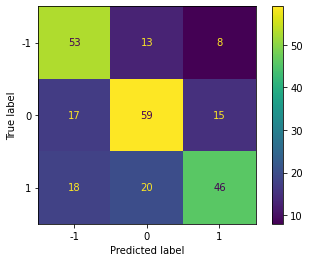

****************************************************************************************************
classification report of MultinomialNB()
              precision    recall  f1-score   support

          -1       0.59      0.73      0.65        74
           0       0.63      0.53      0.57        91
           1       0.60      0.58      0.59        84

    accuracy                           0.61       249
   macro avg       0.61      0.61      0.61       249
weighted avg       0.61      0.61      0.60       249

----------------------------------------------------------------------------------------------------
ConfusionMatrixDisplay of MultinomialNB()


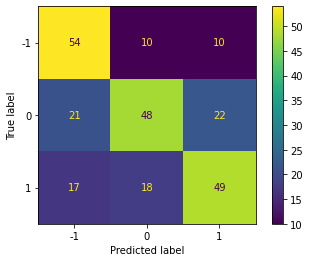

****************************************************************************************************
classification report of RandomForestClassifier()
              precision    recall  f1-score   support

          -1       0.50      0.73      0.60        74
           0       0.67      0.66      0.66        91
           1       0.65      0.40      0.50        84

    accuracy                           0.59       249
   macro avg       0.61      0.60      0.59       249
weighted avg       0.61      0.59      0.59       249

----------------------------------------------------------------------------------------------------
ConfusionMatrixDisplay of RandomForestClassifier()


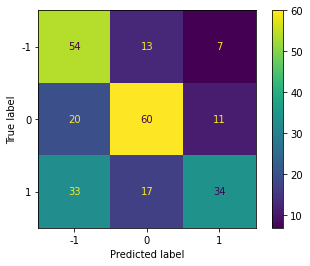

****************************************************************************************************
classification report of AdaBoostClassifier()
              precision    recall  f1-score   support

          -1       0.50      0.28      0.36        74
           0       0.44      0.78      0.56        91
           1       0.54      0.30      0.38        84

    accuracy                           0.47       249
   macro avg       0.49      0.45      0.44       249
weighted avg       0.49      0.47      0.44       249

----------------------------------------------------------------------------------------------------
ConfusionMatrixDisplay of AdaBoostClassifier()


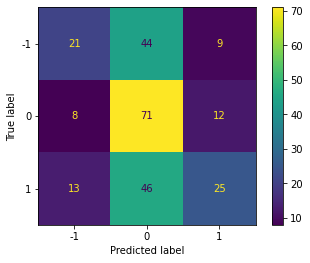

In [ ]:
# Evaluate the efficiancy of the model
from sklearn.metrics import ConfusionMatrixDisplay,classification_report
import matplotlib.pyplot as plt


for i in lst_model:
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print('*'*100)
  print('classification report of',i)
  print(classification_report(y_test,y_pred))
  print('-'*100)
  print('ConfusionMatrixDisplay of', i)
  print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))
  plt.show()